# Clínica
Uma clínica que realiza atendimento para pacientes de duas especialidades médicas (dermatologia e alergologia) deseja avaliar a satisfação de seus usuários. Para isso, eles decidem coletar um indicador que chamaram de índice de satisfação. Esse índice é coletado através de um formulário de 10 perguntas que, ao final, é resumido em uma nota de 0 a 10 para a 
satisfação. Para coletar os dados, eles aplicam esses questionários em 10 pacientes por dia, durante 20 dias. Também é anotada a especialidade frequentada por cada paciente.

1.  Que tipo de variável é o índice de satisfação? É uma variável de contagem, classificação ou uma variável contínua?
2. Avalie como está a distribuição das notas durante os 20 dias como um todo. Lembre-se de escolher o tipo correto de gráfico de frequência para esta variável. Ainda não vamos fazer este gráfico estratificado por especialidade, vamos entender como se comporta a satisfação para toda a clínica primeiro.
3. Ao longo dos 20 dias, é possível ver alguma diferença na nota para cada especialidade? Estratifique sua análise de dados e compare as frequências (use a coluna “Especialidades” para agrupar os dados na hora de traçar o gráfico).
4. O que isso indica sobre a satisfação? O que no processo poderia gerar esse comportamento?
5. Agora, faça uma análise temporal do índice de satisfação. Supondo que os pacientes tivessem todos sido coletados em ordem cronológica, desenvolva um gráfico de tendência da satisfação por paciente. A análise pode ser feita para todo o conjunto de dados ou estratificado (com grupos) por dermatologia e alergologia. Avalie se há alguma tendência no gráfico.
6. Se uma mudança foi feita a partir do décimo dia, o que podemos dizer dela?
7. Agora, vamos tentar olhar essa satisfação por dia. Para isso, é necessário “trabalhar a base”.
8. Aqui, vamos ter que fazer uma média do índice de satisfação a cada dia e, em seguida, traçar essa nova base.
9. O que podemos dizer da satisfação por dia?
10. Para finalizar, diga se a amostra estava equilibrada entre as especialidades. Será que houve mais pacientes de dermatologia do que de alergologia na amostra? Faça o gráfico de frequência apropriado para dizer.

## Importando a base de Dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('clinica.csv', encoding = 'ISO-8859-1', sep = ';')
dados.head(10)

,Paciente,Dia,Especialidade,Satisfação
0,1,1,D,"7,49"
1,2,1,D,"7,77"
2,3,1,D,"7,82"
3,4,1,A,"8,18"
4,5,1,D,"8,14"
5,6,1,A,"7,98"
6,7,1,A,"7,70"
7,8,1,A,"7,79"
8,9,1,D,"8,30"
9,10,1,D,"7,71"


In [3]:
dados.dtypes

Paciente          int64
Dia               int64
Especialidade    object
Satisfação       object
dtype: object

In [4]:
dados['Satisfação'] = dados['Satisfação'].str.replace(",", ".").astype(float)

In [5]:
dados.dtypes

Paciente           int64
Dia                int64
Especialidade     object
Satisfação       float64
dtype: object

In [6]:
dados.shape

(200, 4)

## Resolução Item 2
Avalie como está a distribuição das notas durante os 20 dias como um todo. Lembre-se de escolher o tipo correto de gráfico de frequência para esta variável. Ainda não vamos fazer este gráfico estratificado por especialidade, vamos entender como se comporta a satisfação para toda a clínica primeiro.

In [7]:
import seaborn as sns

<Axes: xlabel='Satisfação', ylabel='Count'>

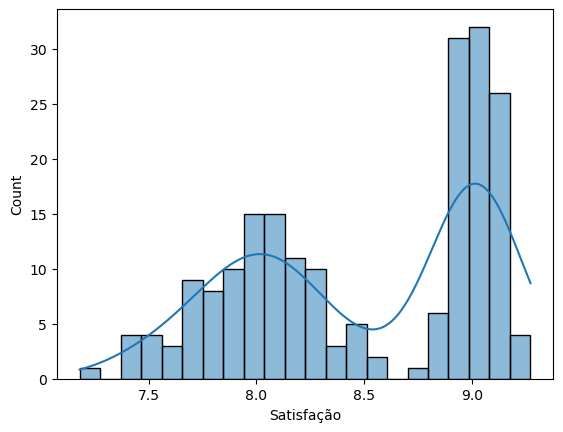

In [8]:
sns.histplot(dados['Satisfação'], bins = 22, kde=True)

## Resolução Item 3
Ao longo dos 20 dias, é possível ver alguma diferença na nota para cada especialidade? Estratifique sua análise de dados e compare as frequências (use a coluna “Especialidades” para agrupar os dados na hora de traçar o gráfico).

In [35]:
# Transformar os dados em formato longo
dados_melt = pd.melt(dados, value_vars=['Satisfação'], id_vars=['Especialidade'], var_name='variavel', value_name='valor')
dados_melt

,Especialidade,variavel,valor
0,D,Satisfação,7.49
1,D,Satisfação,7.77
2,D,Satisfação,7.82
3,A,Satisfação,8.18
4,D,Satisfação,8.14
...,...,...,...
195,A,Satisfação,8.96
196,A,Satisfação,8.95
197,D,Satisfação,9.16
198,D,Satisfação,8.93


<Axes: xlabel='valor', ylabel='Count'>

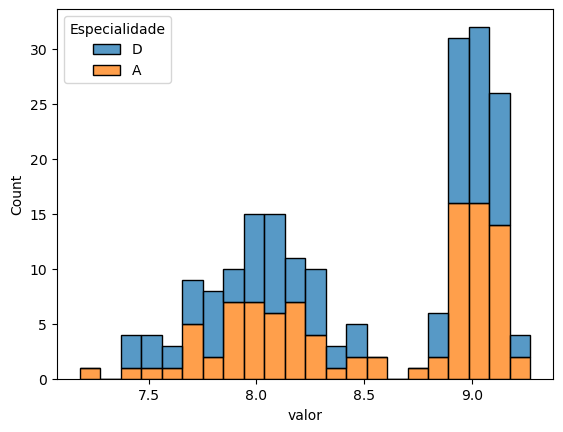

In [51]:
sns.histplot(data=dados_melt, x="valor", hue="Especialidade", bins = 22, multiple="stack")